**50_Startups**

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence
import seaborn as sns
import statsmodels.api as sm


In [4]:
#creating the dataset
df=pd.read_csv('50_Startups.csv')

In [5]:
#Extracting features and target variable
X=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [7]:
#Encoding categorical data
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [3])], remainder='passthrough')

In [8]:
X=np.array(ct.fit_transform(X))

In [12]:
#performing Multi-Linear Regression
X_with_const=sm.add_constant(X)
model=sm.OLS(y,X_with_const).fit()

In [23]:
regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

In [17]:
#Calculate VIF for each variable
vif_data=pd.DataFrame()
vif_data['variable']=ct.get_feature_names_out()
vif_data['VIF']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]

In [20]:
#print the VIF values
print('VIF values:')
print(vif_data)

VIF values:
                     variable       VIF
0   encoder__State_California  9.044052
1      encoder__State_Florida  9.443578
2     encoder__State_New York  9.222969
3        remainder__R&D Spend  2.495511
4   remainder__Administration  1.177766
5  remainder__Marketing Spend  2.416797


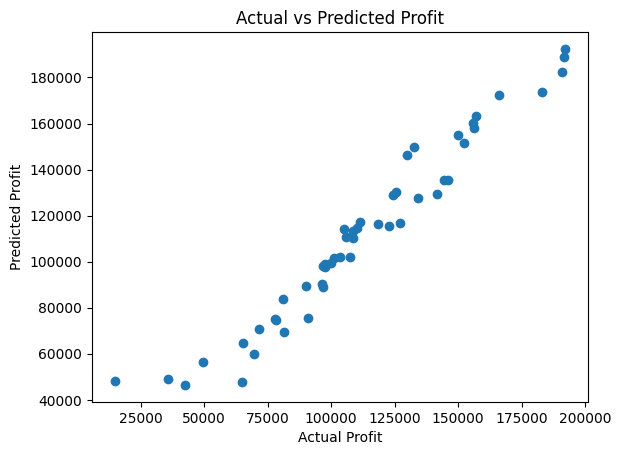

In [27]:
#Visualizing the results
#Scatter plot for actual vs predicted values
y_pred= regressor.predict(X)
plt.scatter(y,y_pred)
plt.xlabel('Actual Profit')
plt.ylabel('Predicted Profit')
plt.title('Actual vs Predicted Profit')
plt.show()

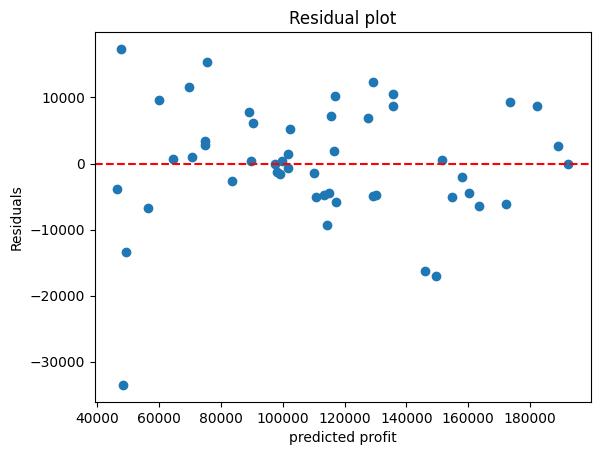

In [28]:
#Residual plot
residuals=y-y_pred
plt.scatter(y_pred, residuals)
plt.xlabel('predicted profit')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual plot')
plt.show()

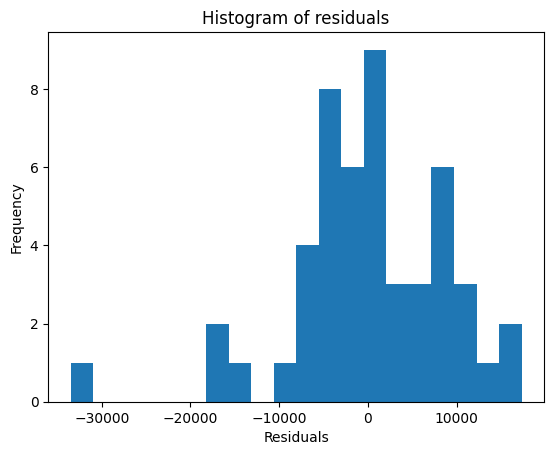

In [29]:
#Histogram of Residuals
plt.hist(residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()

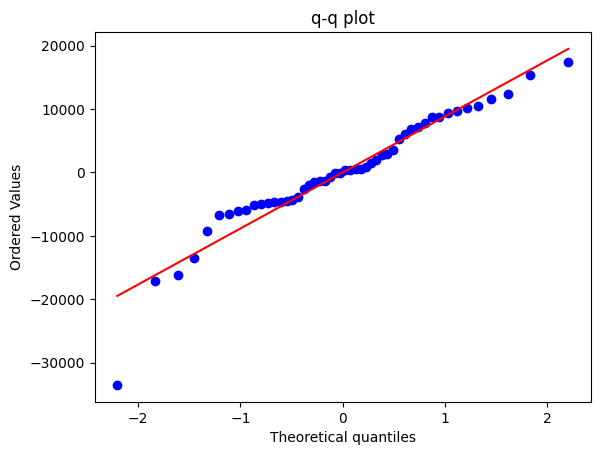

In [30]:
#Q-Q plot(Normality Check)
from scipy.stats import probplot
probplot(residuals, plot=plt)
plt.title('q-q plot')
plt.show()

In [32]:
#Cook's distance
influence=model.get_influence()
cook_distance=influence.cooks_distance
df['Cook\'s Distance']=cook_distance[0]

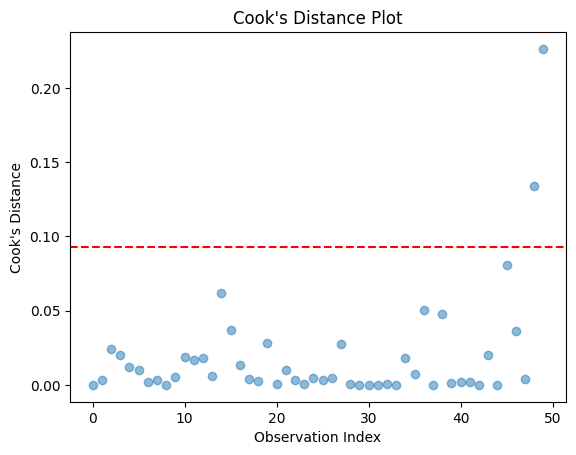

In [34]:
#scatter plot for Cook's distance
plt.scatter(df.index, cook_distance[0], marker='o', alpha=0.5)
plt.axhline(y=4/(len(X)-len(X[0])-1), color='r', linestyle='--')
plt.xlabel('Observation Index')
plt.ylabel('Cook\'s Distance')
plt.title('Cook\'s Distance Plot')
plt.show()

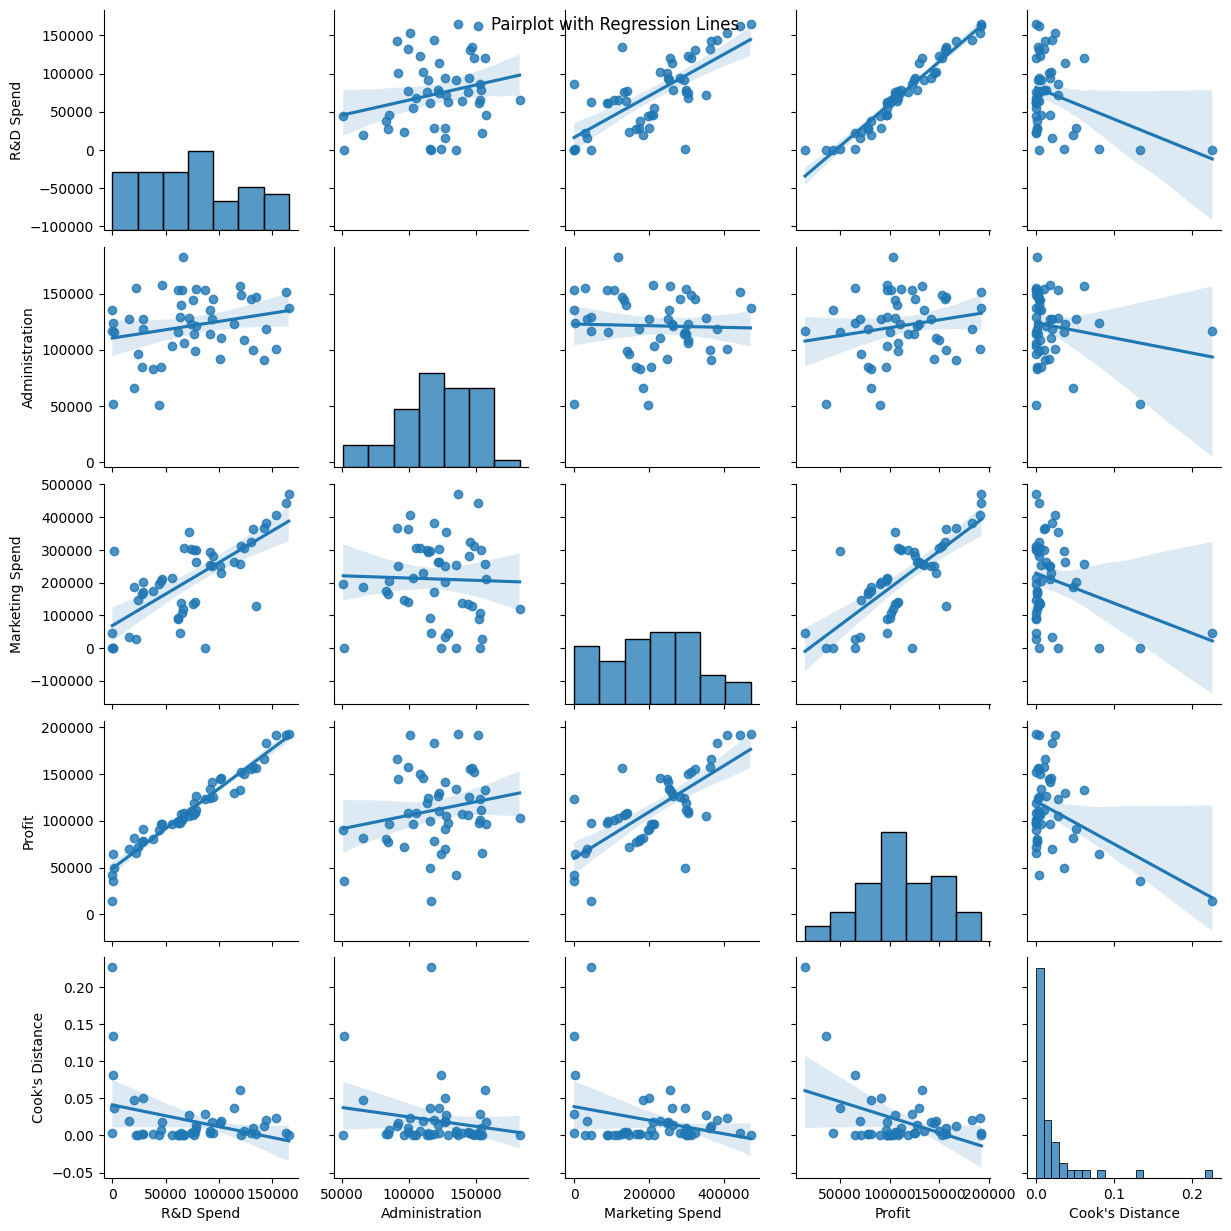

In [35]:
#Pairplot with regression line
sns.pairplot(df, kind='reg')
plt.suptitle('Pairplot with Regression Lines')
plt.show()

In [36]:
#R-squared value
r_squared=model.rsquared
print('R-squared value:',r_squared)

R-squared value: 0.9507524843355148


**ToyotaCorolla**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [38]:
#Load the dataset
corolla=pd.read_csv('ToyotaCorolla.csv',encoding='latin1')


In [39]:
#Selecting the specified columns
selected_columns = ["Price", "Age_08_04", "KM", "HP", "cc", "Doors", "Gears", "Quarterly_Tax", "Weight"]

In [42]:
corolla_selected= corolla[selected_columns]

In [43]:
#handling missing values if any
corolla_selected.dropna(inplace=True)

<ipython-input-43-3ffe2dec5737>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  corolla_selected.dropna(inplace=True)


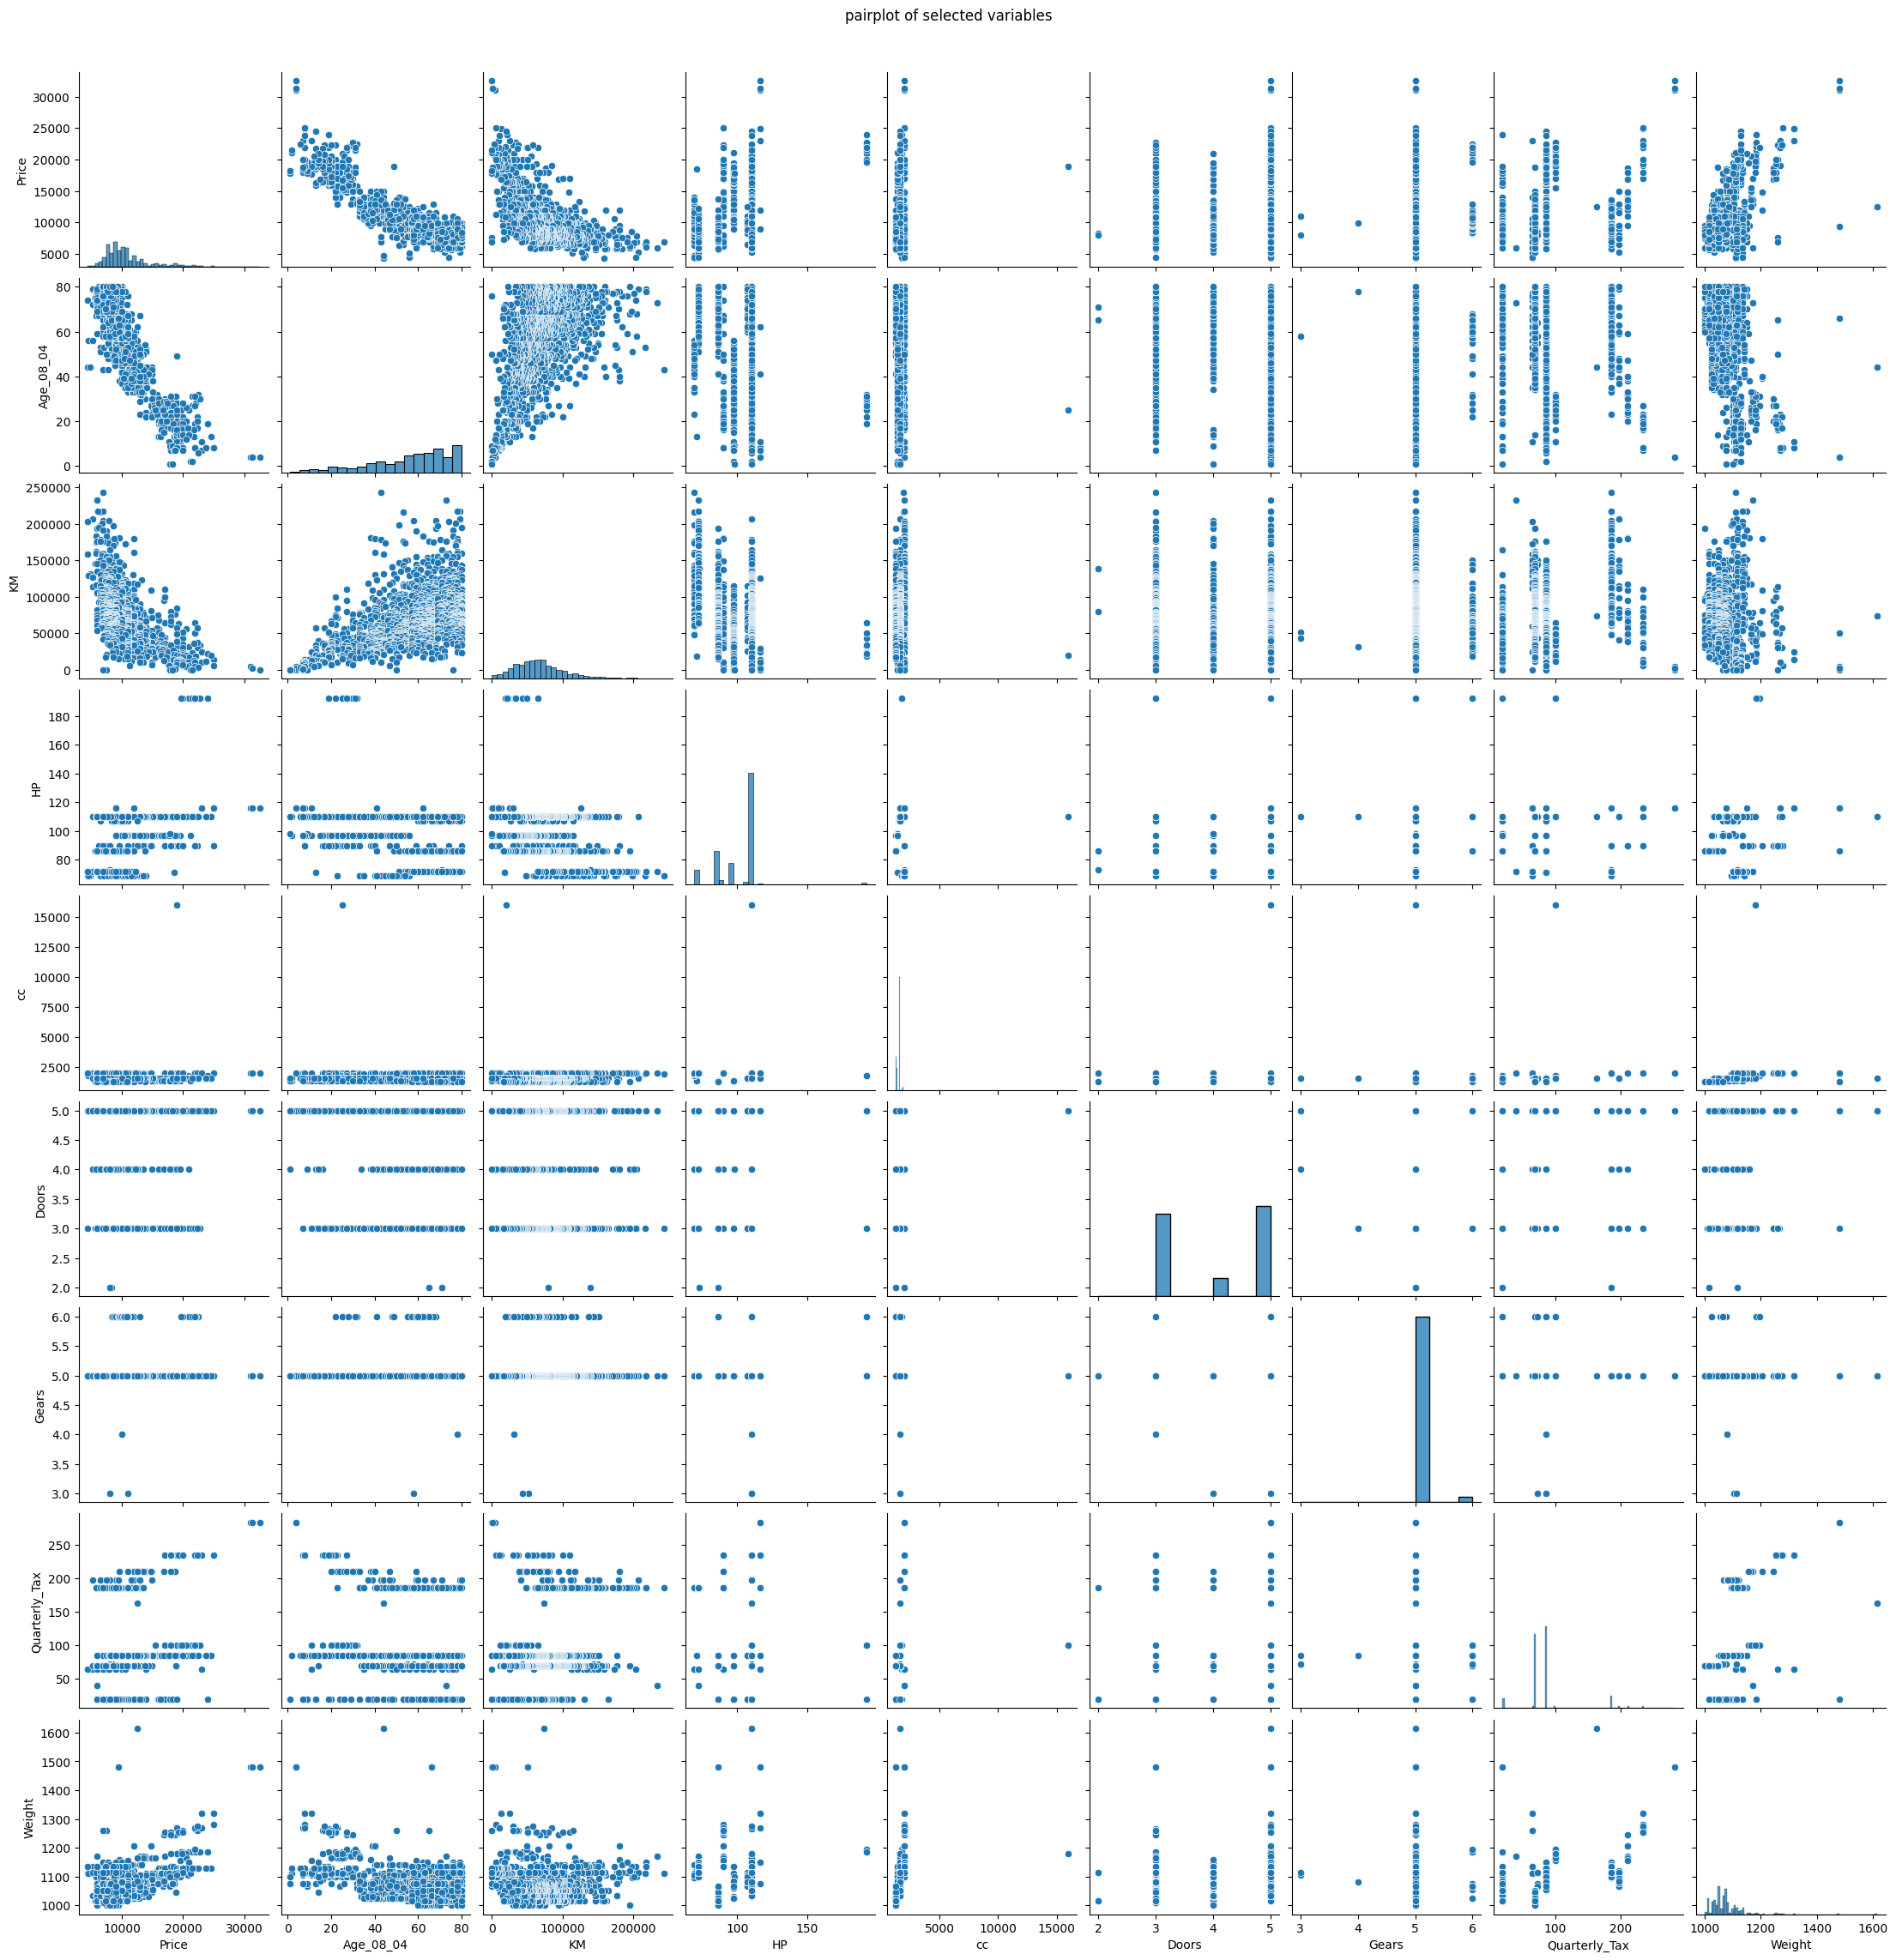

In [45]:
#pairplot for visualizing relationship between selected variables
sns.pairplot(corolla_selected)
plt.suptitle('pairplot of selected variables', y=1.02)
plt.show()


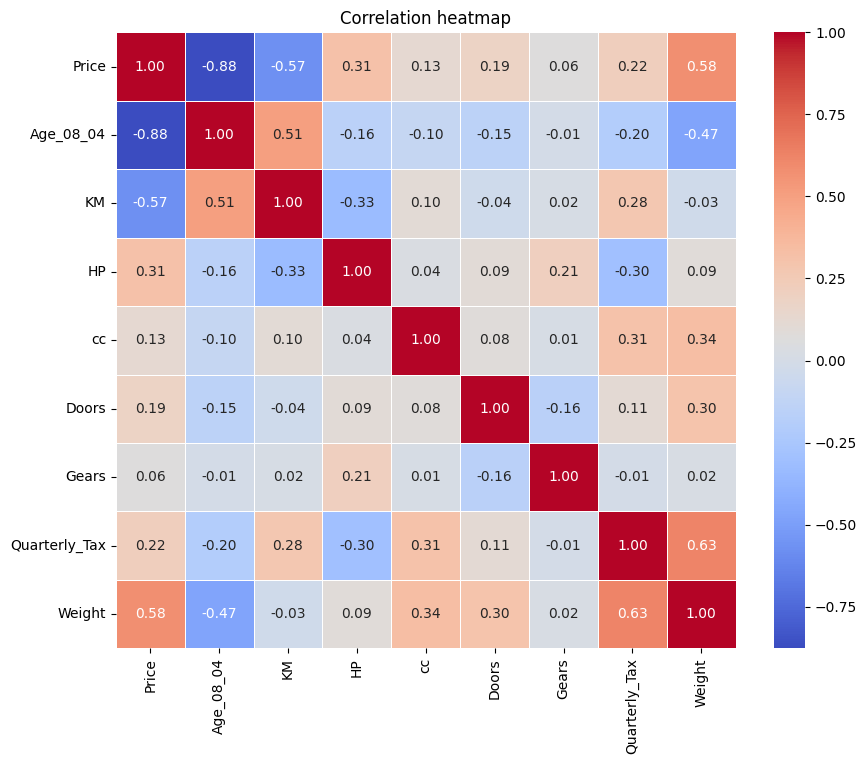

In [47]:
#Correlation heatmap to visualize the correlation between variables
correlation_matrix=corolla_selected.corr()
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True, cmap='coolwarm', fmt='.2f',linewidth=0.5)
plt.title('Correlation heatmap')
plt.show()

In [58]:
# Splitting the data into training and testing sets
X = corolla_selected.drop("Price", axis=1)

In [56]:
y=corolla_selected['Price']

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [59]:
#Multicollinearity analysis using VIF
vif_data=pd.DataFrame()
vif_data['Variable']=X.columns
vif_data['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

In [60]:
print('VIF values')
print(vif_data)


VIF values
        Variable         VIF
0      Age_08_04   16.392684
1             KM    7.590522
2             HP   64.894960
3             cc   17.199750
4          Doors   21.874692
5          Gears  438.631804
6  Quarterly_Tax   11.020074
7         Weight  543.133076


In [61]:
#Linear Regression model with scikit-learn
linear_reg_model =LinearRegression()


In [62]:
linear_reg_model.fit(X_train, y_train)


LinearRegression()

In [63]:
y_pred_linear_reg=linear_reg_model.predict(X_test)

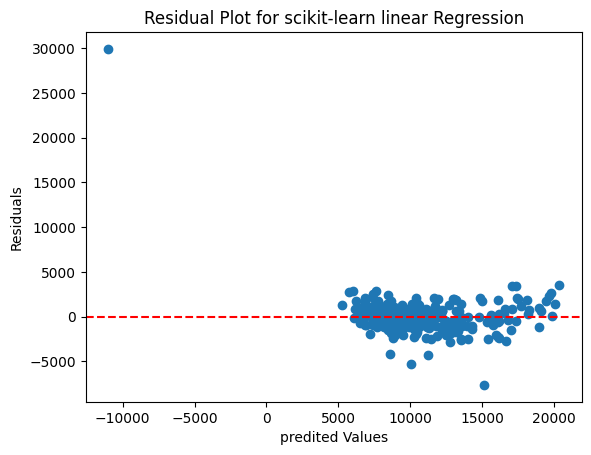

In [64]:
#Residual plot for scikit-learn Linear Regression
residuals=y_test-y_pred_linear_reg
plt.scatter(y_pred_linear_reg, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Plot for scikit-learn linear Regression')
plt.xlabel('predited Values')
plt.ylabel('Residuals')
plt.show()

In [71]:
#Statsmodel linear Regression model (for detailed statistics)
X_train_statsmodels=sm.add_constant(X_train)

In [67]:
statsmodels_model=sm.OLS(y_train, X_train_statsmodels).fit()

In [68]:
X_test_statsmodels=sm.add_constant(X_test)

In [72]:
y_pred_statsmodels=statsmodels_model.predict(X_test_statsmodels)


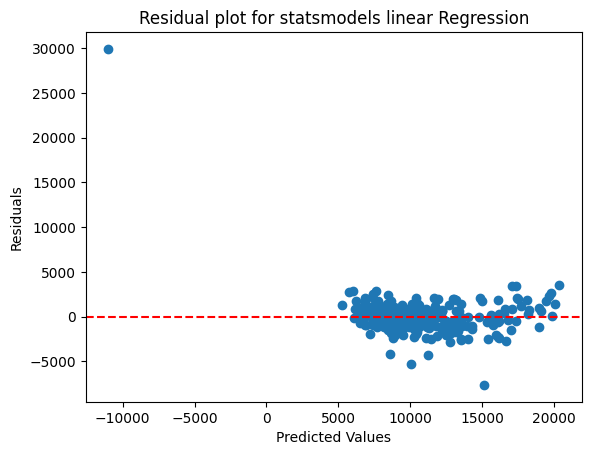

In [75]:
#Residual plot for Statsmodels Linear Regression
residuals_statsmodels=y_test-y_pred_statsmodels
plt.scatter(y_pred_statsmodels, residuals_statsmodels)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual plot for statsmodels linear Regression')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [76]:
#Cook's  distance for the entire dataset
cook_distance=influence.cooks_distance

In [77]:
#Check if lengths match before proceeding
if len(cook_distance[0])==len(corolla_selected):
  corolla_selected['Cook\'s Distance']=cook_distance[0]

In [91]:
# Cook's distance for the entire dataset
cook_distance = influence.cooks_distance

# Check if lengths match before proceeding
if len(cook_distance[0]) == len(corolla_selected):
    corolla_selected['Cook\'s Distance'] = cook_distance[0]

    # Selecting Cook's distance values for the test set
    corolla_test_cooks = corolla_selected.loc[X_test.index, ['Price', 'Cook\'s Distance']]  # Selecting relevant columns

    # Leverage Cutoff (threshold for high leverage points)
    leverage_cutoff = 2 * (X_train.shape[1] + 1) / X_train.shape[0]
    high_leverage_points = corolla_test_cooks[corolla_test_cooks['Cook\'s Distance'] > leverage_cutoff]

    # Display high leverage points
    print("High Leverage Points:")
    print(high_leverage_points)
else:
    print("Lengths do not match. Please check your data.")

Lengths do not match. Please check your data.


In [92]:
#Calculate R-squared value
r_squared=r2_score(y_test, y_pred_linear_reg)

In [93]:
print('R-squared value (scikit-learn):',r_squared)

R-squared value (scikit-learn): 0.5995582859225217


In [94]:
r_squared_statsmodels=statsmodels_model.rsquared

In [95]:
print('R-squared value (Statsmodels):',r_squared_statsmodels)

R-squared value (Statsmodels): 0.8737898828869015


In [97]:
#Display the metrics
metrics_table=pd.DataFrame({
    'Model': ['Multi Linear Regression (scikit-learn)', 'Statsmodels Linear Regression'],
    'R^2': [r_squared, r_squared_statsmodels],
    'MAE': [mean_absolute_error(y_test, y_pred_linear_reg), mean_absolute_error(y_test, y_pred_statsmodels)],
    'MSE': [mean_squared_error(y_test, y_pred_linear_reg), mean_squared_error(y_test, y_pred_statsmodels)],
    'RMSE': [np.sqrt(mean_squared_error(y_test, y_pred_linear_reg)), np.sqrt(mean_squared_error(y_test, y_pred_statsmodels))]
})

In [98]:
print('\nMetrics Table:')
print(metrics_table)


Metrics Table:
                                    Model       R^2          MAE  \
0  Multi Linear Regression (scikit-learn)  0.599558  1109.923521   
1           Statsmodels Linear Regression  0.873790  1109.923521   

            MSE         RMSE  
0  4.982412e+06  2232.131639  
1  4.982412e+06  2232.131639  
